In [3]:
import pandas as pd
import scipy

In [2]:
# These are discrete curves for ebird (eb) and iNat (in) respectively
eb_19_d = pd.read_parquet('./generated_data/eBird_curves_19_final.parquet')
eb_22_d = pd.read_parquet('./generated_data/eBird_curves_22_final.parquet')
in_19_d = pd.read_parquet('./generated_data/iNat_curves_19_final.parquet')
in_22_d = pd.read_parquet('./generated_data/iNat_curves_22_final.parquet')

In [4]:
def function_smoothing(x, sigma=2):
    y = scipy.ndimage.gaussian_filter(
        x,
        sigma
    )
    return y

In [11]:
eb_19_d.values[0, :]

(52,)

In [13]:
eb_19_d.shape

(260, 52)

In [20]:
eb_19_s_x = []
eb_22_s_x = []
in_19_s_x = []
in_22_s_x = []
for i in range(260):
    eb_19_s_x.append(function_smoothing(eb_19_d.values[i, :]))
    eb_22_s_x.append(function_smoothing(eb_22_d.values[i, :]))
    in_19_s_x.append(function_smoothing(in_19_d.values[i, :]))
    in_22_s_x.append(function_smoothing(in_22_d.values[i, :]))



In [39]:
eb_19_s = pd.DataFrame( columns=eb_19_d.columns, data= eb_19_s_x, index=eb_19_d.index)
eb_22_s = pd.DataFrame( columns=eb_22_d.columns, data= eb_22_s_x, index=eb_22_d.index)
in_19_s = pd.DataFrame( columns=in_19_d.columns, data= in_19_s_x, index=in_19_d.index)
in_22_s = pd.DataFrame( columns=in_22_d.columns, data= in_22_s_x, index=in_22_d.index)

In [43]:
from scipy.special import kl_div
from scipy.spatial.distance import jensenshannon
from scipy.stats import wasserstein_distance

In [44]:
def generate_dist(x, dist, sigma=2):
    aviID = x
    y1 = in_19_s.loc[aviID, :].values.copy()
    y1_22 = in_22_s.loc[aviID, :].values.copy()
    y2 = eb_19_s.loc[aviID, :].values.copy()
    y2_22 = eb_22_s.loc[aviID, :].values.copy()
    dist_inat = (dist(y1, y1_22)).sum()
    dist_ebird = (dist(y2, y2_22)).sum()
    dist_19 = (dist(y1, y2)).sum()
    dist_22 = (dist(y1_22, y2_22)).sum()
    to_return = [
        x,
        dist_inat,
        dist_ebird,
        dist_19,
        dist_22,
    ]
    return to_return

In [45]:
all_kl_dist = []
for bird in eb_19_s.index:
    a = generate_dist(bird, kl_div, sigma=2)
    all_kl_dist.append(a)

In [46]:
import numpy as np

In [47]:
df_all_kl_dists = pd.DataFrame(np.array(all_kl_dist))

In [48]:
df_all_kl_dists.columns = [
    'AvibaseID',
    'iNat',
    'eBird',
    'Y19',
    'Y22'
]

In [49]:
df_all_kl_dists

,AvibaseID,iNat,eBird,Y19,Y22
0,7E327303,0.01780942330825682,0.0036177805819240273,0.008355935532457526,0.0359248921308658
1,AA7901D8,0.01570189963645009,0.00461389062363916,0.01288985548532379,0.0034567938086616443
2,3647E146,0.5332208553458636,0.07473160780143412,0.14861288103933631,0.3131852941623716
3,9A77D2B0,0.6471081880773597,0.08894816461785691,1.001184538370969,0.17925843531668123
4,1CBD2CED,0.6795157069522169,0.11156549019552423,0.22093586078250577,0.19708154407361014
...,...,...,...,...,...
255,12E354E2,0.27388400543012614,0.009590536757959395,0.25488701267581687,0.10285954045975548
256,ACB9D1C6,0.13382615796425942,0.036006136606150076,0.29152014040455043,0.14998129945504202
257,06B9BD24,0.04238152077102913,0.02327223852744372,0.058896184735699006,0.020910179232565863
258,F9305BAA,0.03630620377576597,0.02806782657794751,0.049698300548727876,0.03408701141431404


In [68]:
def generate_dist2(x, dist, sigma=2):
    aviID = x
    y1 = in_19_s.loc[aviID, :].values.copy()
    y1_22 = in_22_s.loc[aviID, :].values.copy()
    y2 = eb_19_s.loc[aviID, :].values.copy()
    y2_22 = eb_22_s.loc[aviID, :].values.copy()
    dist_inat = (dist(y1, y1_22))
    dist_ebird = (dist(y2, y2_22))
    dist_19 = (dist(y1, y2))
    dist_22 = (dist(y1_22, y2_22))
    to_return = [
        x,
        dist_inat,
        dist_ebird,
        dist_19,
        dist_22,
    ]
    return to_return

In [69]:
all_js_dist = []
for bird in eb_19_s.index:
    a = generate_dist(bird, jensenshannon, sigma=2)
    all_js_dist.append(a)

In [70]:
import numpy as np

In [71]:
df_all_js_dists = pd.DataFrame(np.array(all_js_dist))

In [72]:
df_all_js_dists.columns = [
    'AvibaseID',
    'iNat',
    'eBird',
    'Y19',
    'Y22'
]

In [73]:
df_all_js_dists

,AvibaseID,iNat,eBird,Y19,Y22
0,7E327303,0.06670290771414913,0.030301320283779708,0.04588574357257456,0.09385540000636639
1,AA7901D8,0.062427018725321845,0.034045014862036864,0.056628304790264775,0.029154913689772296
2,3647E146,0.3269442971269486,0.1379490187200341,0.2033942238004113,0.27768249558300184
3,9A77D2B0,0.36448711745354084,0.1596377411897463,0.4405479512188041,0.21464007163851537
4,1CBD2CED,0.3023279275828896,0.14105136347077332,0.2355827469399066,0.23500969473038733
...,...,...,...,...,...
255,12E354E2,0.27336623945953537,0.048980657976272664,0.26911691165063184,0.1583061684977432
256,ACB9D1C6,0.18083052962494486,0.09496597487269194,0.2861865617544564,0.20339920676983514
257,06B9BD24,0.10362167118886315,0.07663738473070629,0.11992866499921344,0.07246058899060843
258,F9305BAA,0.09468561557333871,0.08323094518310555,0.10956440116597488,0.09117879161530523


In [56]:
def generate_dist2(x, dist, sigma=2):
    aviID = x
    y1 = in_19_s.loc[aviID, :].values.copy()
    y1_22 = in_22_s.loc[aviID, :].values.copy()
    y2 = eb_19_s.loc[aviID, :].values.copy()
    y2_22 = eb_22_s.loc[aviID, :].values.copy()
    dist_inat = (dist(y1, y1_22))
    dist_ebird = (dist(y2, y2_22))
    dist_19 = (dist(y1, y2))
    dist_22 = (dist(y1_22, y2_22))
    to_return = [
        x,
        dist_inat,
        dist_ebird,
        dist_19,
        dist_22,
    ]
    return to_return

In [57]:
all_ws_dist = []
for bird in eb_19_s.index:
    a = generate_dist(bird, wasserstein_distance, sigma=2)
    all_ws_dist.append(a)

In [58]:
import numpy as np

In [59]:
df_all_ws_dists = pd.DataFrame(np.array(all_ws_dist))

In [60]:
df_all_ws_dists.columns = [
    'AvibaseID',
    'iNat',
    'eBird',
    'Y19',
    'Y22'
]

In [61]:
df_all_ws_dists

,AvibaseID,iNat,eBird,Y19,Y22
0,7E327303,0.0008670994292329252,0.0006898164927034081,0.0005915016344295869,0.0008357605012265533
1,AA7901D8,0.0007277085790012453,0.0007510036984362049,0.0009624607205019925,0.0009685591953228408
2,3647E146,0.0028635096682991905,0.002243787117801779,0.004455437144716612,0.003686472152992122
3,9A77D2B0,0.006446435178739206,0.005921933918904236,0.010426206323793073,0.003912706356243483
4,1CBD2CED,0.004299197508488962,0.0038661431542861818,0.006178548440607126,0.006890889259466935
...,...,...,...,...,...
255,12E354E2,0.005509843747326094,0.0013896311855026255,0.006517259333981486,0.0013836857030923451
256,ACB9D1C6,0.0027856877396322663,0.0025810188317526967,0.007664653107643488,0.00647583107063357
257,06B9BD24,0.0034033985826846047,0.0016915467326345064,0.004639641777158288,0.002891007934900335
258,F9305BAA,0.001778713769040053,0.002976182635898015,0.001830762054993139,0.0036284387577455598


In [81]:
all_distances = df_all_js_dists.merge(df_all_ws_dists, how='left', on='AvibaseID',suffixes=['_js', '_ws'])

In [82]:
all_distances

,AvibaseID,iNat_js,eBird_js,Y19_js,Y22_js,iNat_ws,eBird_ws,Y19_ws,Y22_ws
0,7E327303,0.06670290771414913,0.030301320283779708,0.04588574357257456,0.09385540000636639,0.0008670994292329252,0.0006898164927034081,0.0005915016344295869,0.0008357605012265533
1,AA7901D8,0.062427018725321845,0.034045014862036864,0.056628304790264775,0.029154913689772296,0.0007277085790012453,0.0007510036984362049,0.0009624607205019925,0.0009685591953228408
2,3647E146,0.3269442971269486,0.1379490187200341,0.2033942238004113,0.27768249558300184,0.0028635096682991905,0.002243787117801779,0.004455437144716612,0.003686472152992122
3,9A77D2B0,0.36448711745354084,0.1596377411897463,0.4405479512188041,0.21464007163851537,0.006446435178739206,0.005921933918904236,0.010426206323793073,0.003912706356243483
4,1CBD2CED,0.3023279275828896,0.14105136347077332,0.2355827469399066,0.23500969473038733,0.004299197508488962,0.0038661431542861818,0.006178548440607126,0.006890889259466935
...,...,...,...,...,...,...,...,...,...
255,12E354E2,0.27336623945953537,0.048980657976272664,0.26911691165063184,0.1583061684977432,0.005509843747326094,0.0013896311855026255,0.006517259333981486,0.0013836857030923451
256,ACB9D1C6,0.18083052962494486,0.09496597487269194,0.2861865617544564,0.20339920676983514,0.0027856877396322663,0.0025810188317526967,0.007664653107643488,0.00647583107063357
257,06B9BD24,0.10362167118886315,0.07663738473070629,0.11992866499921344,0.07246058899060843,0.0034033985826846047,0.0016915467326345064,0.004639641777158288,0.002891007934900335
258,F9305BAA,0.09468561557333871,0.08323094518310555,0.10956440116597488,0.09117879161530523,0.001778713769040053,0.002976182635898015,0.001830762054993139,0.0036284387577455598


In [83]:
from sklearn.decomposition import PCA

In [87]:
pca1 = PCA()
pca2 = PCA()
pca3 = PCA()
pca4 = PCA()

In [98]:
np.array(eb_19_s_x).shape

(260, 52)

In [88]:
pca1.fit(eb_19_s_x)
pca2.fit(eb_22_s_x)
pca3.fit(in_19_s_x)
pca4.fit(in_22_s_x)

PCA()

In [89]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Number of Eigenvectors')

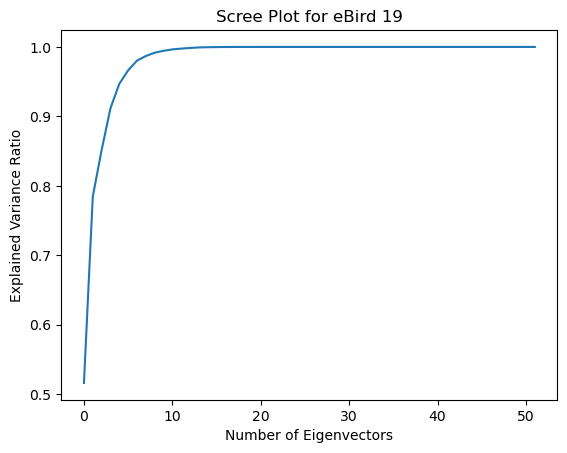

In [91]:
scree = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(scree)
plt.title("Scree Plot for eBird 19")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Number of Eigenvectors")

In [92]:
scree

array([0.51630294, 0.78461069, 0.85152183, 0.91175391, 0.94689855,
       0.96631632, 0.98028399, 0.98687292, 0.99167567, 0.99441927,
       0.99643836, 0.99758474, 0.99854151, 0.99922171, 0.99958793,
       0.99975417, 0.99988743, 0.99994221, 0.99997062, 0.9999855 ,
       0.99999211, 0.99999632, 0.9999984 , 0.99999927, 0.99999966,
       0.99999982, 0.99999994, 0.99999997, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

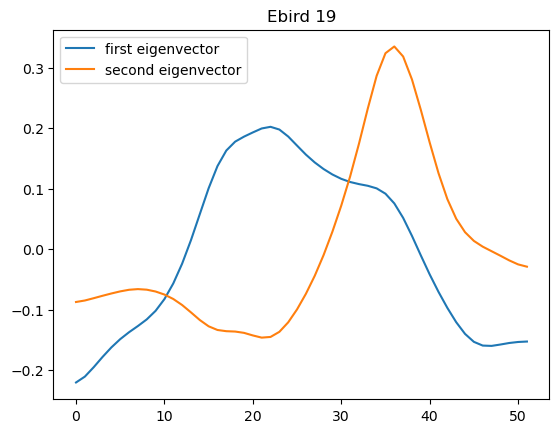

In [101]:
plt.title("Ebird 19")
plt.plot(pca1.components_[0], label='first eigenvector')
plt.plot(pca1.components_[1], label='second eigenvector')
plt.legend()

Text(0.5, 0, 'Number of Eigenvectors')

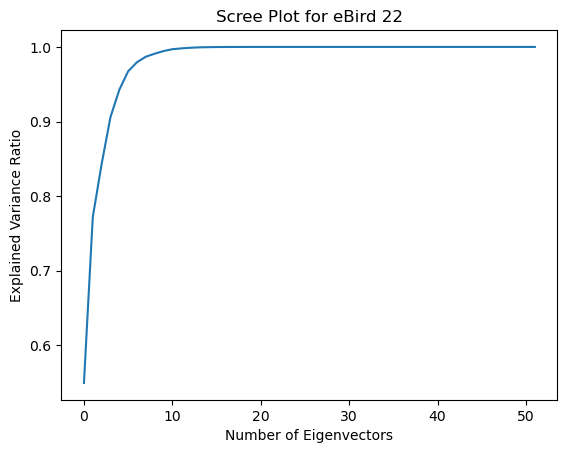

In [102]:
scree = np.cumsum(pca2.explained_variance_ratio_)
plt.plot(scree)
plt.title("Scree Plot for eBird 22")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Number of Eigenvectors")

In [103]:
scree

array([0.54951894, 0.77197789, 0.84299358, 0.90583046, 0.94255439,
       0.96735613, 0.97952017, 0.98689372, 0.99093287, 0.99445934,
       0.99692006, 0.99803236, 0.99884815, 0.99940478, 0.99966097,
       0.99982454, 0.99991214, 0.99995314, 0.99997271, 0.99998594,
       0.9999929 , 0.99999706, 0.9999984 , 0.9999993 , 0.99999967,
       0.99999984, 0.99999994, 0.99999998, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

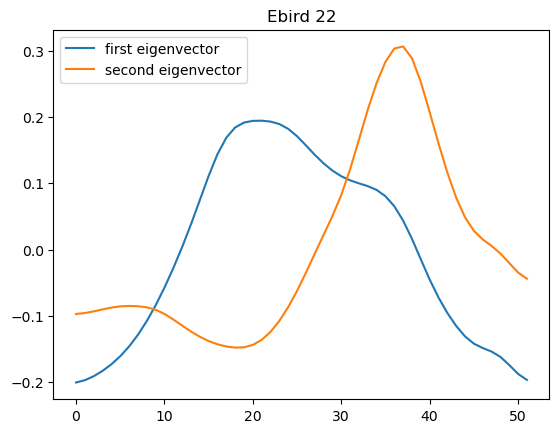

In [104]:
plt.title("Ebird 22")
plt.plot(pca2.components_[0], label='first eigenvector')
plt.plot(pca2.components_[1], label='second eigenvector')
plt.legend()

Text(0.5, 0, 'Number of Eigenvectors')

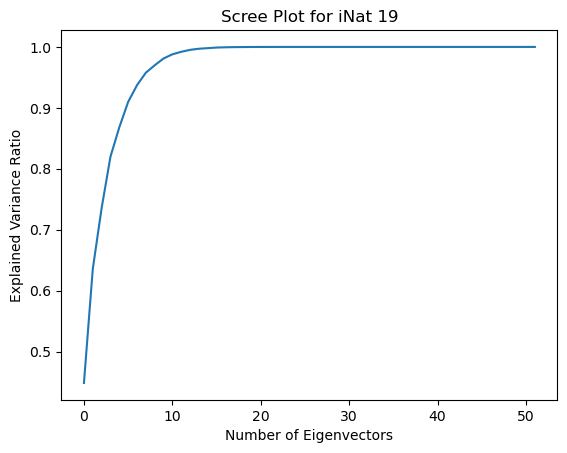

In [105]:
scree = np.cumsum(pca3.explained_variance_ratio_)
plt.plot(scree)
plt.title("Scree Plot for iNat 19")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Number of Eigenvectors")

In [106]:
scree

array([0.4485409 , 0.6356596 , 0.73554499, 0.81994831, 0.86807561,
       0.90978159, 0.93715732, 0.95768569, 0.9698433 , 0.98099293,
       0.98784197, 0.99197633, 0.9952203 , 0.99700093, 0.99800893,
       0.99897229, 0.99938108, 0.99966108, 0.99979764, 0.99990237,
       0.99994643, 0.99997272, 0.99998789, 0.99999496, 0.99999745,
       0.99999887, 0.9999995 , 0.99999978, 0.99999993, 0.99999997,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

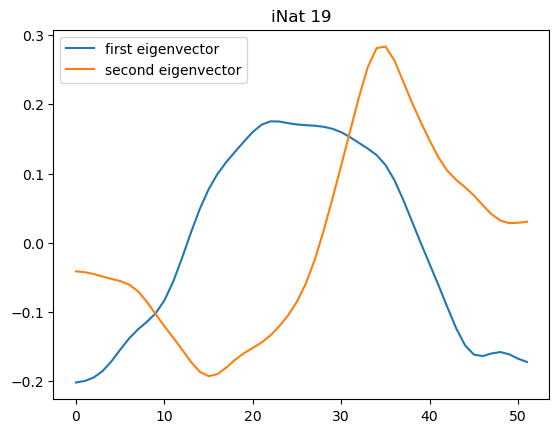

In [108]:
plt.title("iNat 19")
plt.plot(-1*pca3.components_[0], label='first eigenvector')
plt.plot(pca3.components_[1], label='second eigenvector')
plt.legend()

Text(0.5, 0, 'Number of Eigenvectors')

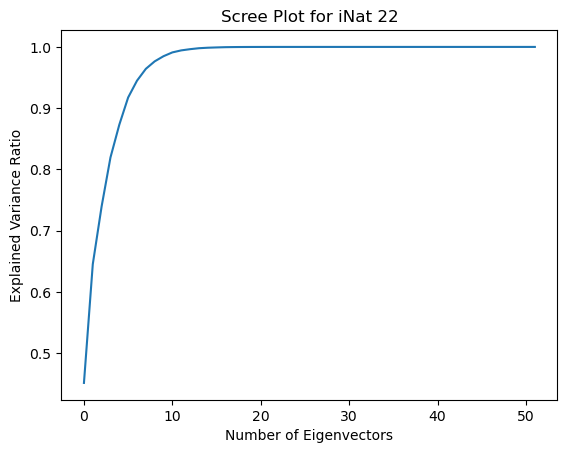

In [109]:
scree = np.cumsum(pca4.explained_variance_ratio_)
plt.plot(scree)
plt.title("Scree Plot for iNat 22")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Number of Eigenvectors")

In [110]:
scree

array([0.45135865, 0.64524567, 0.73965005, 0.81953945, 0.87302626,
       0.91748639, 0.94486202, 0.96422206, 0.97642607, 0.98483983,
       0.99105377, 0.99434003, 0.99631538, 0.9978812 , 0.99869043,
       0.99917449, 0.99958616, 0.99977166, 0.99987848, 0.99993314,
       0.99996672, 0.99998196, 0.99999221, 0.9999961 , 0.99999795,
       0.99999925, 0.99999968, 0.99999986, 0.99999994, 0.99999997,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

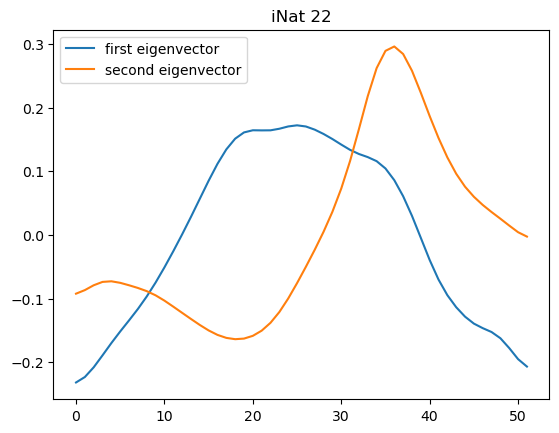

In [112]:
plt.title("iNat 22")
plt.plot(-1*pca4.components_[0], label='first eigenvector')
plt.plot(pca4.components_[1], label='second eigenvector')
plt.legend()

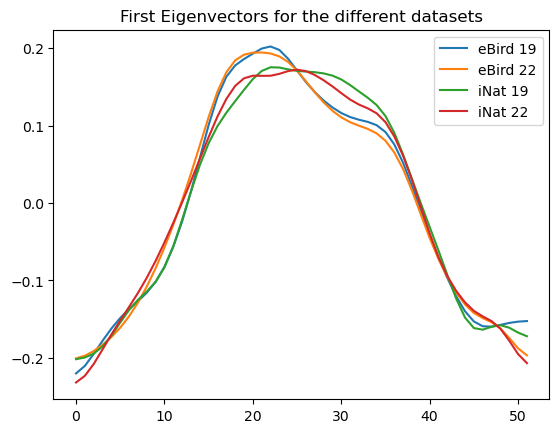

In [116]:
plt.title("First Eigenvectors for the different datasets")
plt.plot(pca1.components_[0], label='eBird 19')
plt.plot(pca2.components_[0], label='eBird 22')
plt.plot(-1*pca3.components_[0], label='iNat 19')
plt.plot(-1*pca4.components_[0], label='iNat 22')
plt.legend()

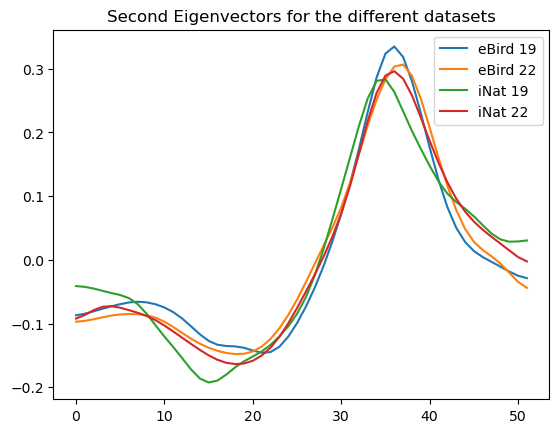

In [117]:
plt.title("Second Eigenvectors for the different datasets")
plt.plot(pca1.components_[1], label='eBird 19')
plt.plot(pca2.components_[1], label='eBird 22')
plt.plot(pca3.components_[1], label='iNat 19')
plt.plot(pca4.components_[1], label='iNat 22')
plt.legend()

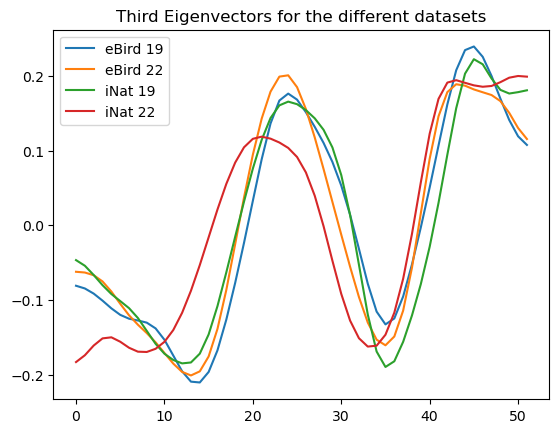

In [119]:
plt.title("Third Eigenvectors for the different datasets")
plt.plot(pca1.components_[2], label='eBird 19')
plt.plot(pca2.components_[2], label='eBird 22')
plt.plot(pca3.components_[2], label='iNat 19')
plt.plot(pca4.components_[2], label='iNat 22')
plt.legend()